# Data Science & Business Analytics Task

## Topic : Supervised Learning

### Created by : Vijay Amble

### Problem Statement : To predict the percentage of an student based on the no. of study hours.

### Method used : Linear & Ridge Regression 

#### Step 1 : Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

#### Step 2 : Loading the Dataset

In [2]:
data = "http://bit.ly/w-data" # importing dataset using url
df= pd.read_csv(data) # reading the dataset using DataFrame
df.head() # to check the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape # to check the total no. of rows and columns

(25, 2)

In [4]:
df.info() # to get the info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull() # to check weather the dataset contains any NULL value or NOT

""" Note : False means no NULL value present
           True means NULL value present"""

' Note : False means no NULL value present\n           True means NULL value present'

#### scatter plot - to check the nature of dataset

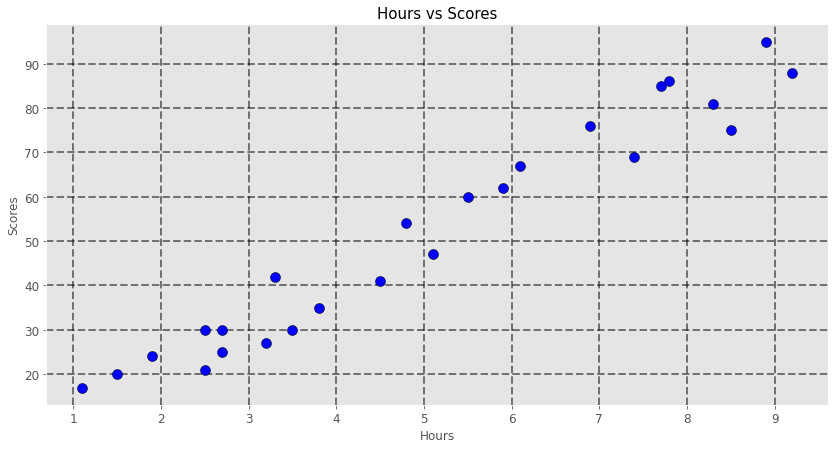

In [6]:
style.use('ggplot')
plt.figure(figsize = (14,7))
plt.scatter(df['Hours'], df['Scores'], color = 'b', s = 100, edgecolor = 'k')
plt.title("Hours vs Scores", fontsize = 15)
plt.xlabel("Hours", fontsize = 12)
plt.ylabel("Scores", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(color = 'k', linewidth = 2, linestyle = '--', alpha = 0.5)
plt.show()

### correlation plot

In [7]:
df.corr() # to check the relation between variables (Hours & Scores)

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


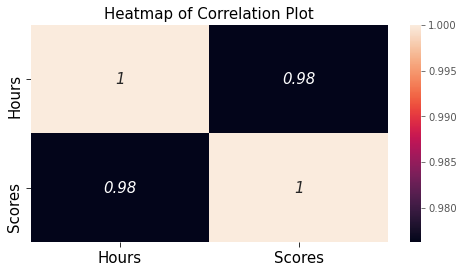

In [8]:
plt.figure(figsize = (8,4))
annot_kws = {'fontsize' : 15, 'fontstyle' : "italic"}
ax = sns.heatmap(df.corr(), annot = True, annot_kws = annot_kws)
ax.tick_params(size = 5, color = 'k', labelsize = 15, labelcolor = 'k')
plt.title("Heatmap of Correlation Plot", fontsize = 15)
plt.show()

### Linear Regression

#### Step 3 : Split Data

In [9]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values
print("Shape of X : ",X.shape)
print("Shape of y : ",y.shape)

Shape of X :  (25, 1)
Shape of y :  (25,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (20, 1)
Shape of X_test :  (5, 1)
Shape of y_train :  (20,)
Shape of y_test :  (5,)


#### Step 4 : ML model training

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("ML Model Trained Successfully")

ML Model Trained Successfully


#### Step 5 : Checking the accuracy

In [12]:
print(lr.score(X_test, y_test)*100,"%") # testing the accuracy of ML model

94.54906892105356 %


In [13]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(X_train, y_train)
print(rd.score(X_test, y_test)*100,"%")

94.69535028586778 %


#### Step 6 : predict the value

In [14]:
y_pred = rd.predict(X_test) # predicting the value using test data
y_pred

array([17.18169996, 33.89456361, 75.18516794, 27.01279622, 60.43852354])

In [15]:
y_test # actual data / main data

array([20, 27, 69, 30, 62], dtype=int64)

#### comparing the values

In [16]:
col_names = {"Actual Values" : y_test, "Predicted Values" : y_pred}
df1 = pd.DataFrame.from_dict(col_names)
df1

,Actual Values,Predicted Values
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


#### Step 7 : Predicting the value

In [17]:
study_hrs = [[9.25]]
predicted_score = lr.predict(study_hrs)
print("Study Hours : ",study_hrs,"hrs")
print("Predicted Score : ",predicted_score,"%")

Study Hours :  [[9.25]] hrs
Predicted Score :  [93.69173249] %


#### Step 8 : Checking the error

In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Square Error : ", mse)
print("Root Mean Square Error : ", rmse)

Mean Square Error :  21.01914402727752
Root Mean Square Error :  4.584664003749623


## THANK YOU!!